<a href="https://colab.research.google.com/github/Meriam-Victor/Face_Detection_and_Recognition_using_Transfer_Learning_on_Pins_Face_Recognition_Dataset./blob/main/Face_Detection_and_Recognition_using_Transfer_Learning_on_Pins_Face_Recognition_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Face Detection with OpenCV's Deep Learning Face Detector


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
print("Please upload the OpenCV face detector weights file (.pb and .pbtxt files)")
uploaded = files.upload()

Please upload the OpenCV face detector weights file (.pb and .pbtxt files)


Saving opencv_face_detector_uint8.pb to opencv_face_detector_uint8.pb


In [ ]:
weights_path = next(iter(uploaded.keys()))
print(weights_path)

opencv_face_detector_uint8.pb


In [ ]:
print("Please upload the OpenCV face detector  model architecture file (.pb and .pbtxt files)")
uploaded1 = files.upload()

Please upload the OpenCV face detector  model architecture file (.pb and .pbtxt files)


Saving opencv_face_detector.pbtxt to opencv_face_detector.pbtxt


In [ ]:
arch_path = next(iter(uploaded1.keys()))
print(arch_path)

opencv_face_detector.pbtxt


In [ ]:
# Get the file paths
pb_files = [filename for filename in uploaded.keys() if filename.endswith('.pb')]
pbtxt_files = [filename for filename in uploaded1.keys() if filename.endswith('.pbtxt')]



In [ ]:
# Load the OpenCV face detector model
net = cv2.dnn.readNetFromTensorflow(pb_files[0], pbtxt_files[0])


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Function to perform face detection on a static photo
def detect_faces(net, frame):
    # Perform face detection
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104., 177., 123.], False, False)
    net.setInput(blob)
    detections = net.forward()

    # Process the detections
    for i in range(0, detections.shape[2]):
        # Get the confidence (probability) of the current detection:
        confidence = detections[0, 0, i, 2]
        # Only consider detections if confidence is greater than a fixed minimum confidence:
        if confidence > 0.7:
            # Get the coordinates of the current detection:
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            # Draw the detection and the confidence:
            text = "{:.3f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 3)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Display the result
    cv2_imshow(frame)


<IPython.core.display.Javascript object>

Saved to photo.jpg


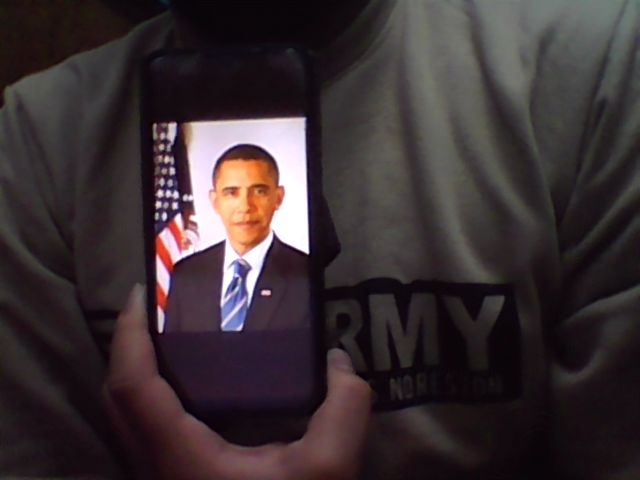

In [ ]:
import cv2
import numpy as np
from IPython.display import Image
from PIL import Image as PIL_Image
from io import BytesIO

try:
    # Capture the photo
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the image using PIL
    img_pil = PIL_Image.open(filename)

    # Convert PIL Image to NumPy array
    img_np = np.array(img_pil)

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))


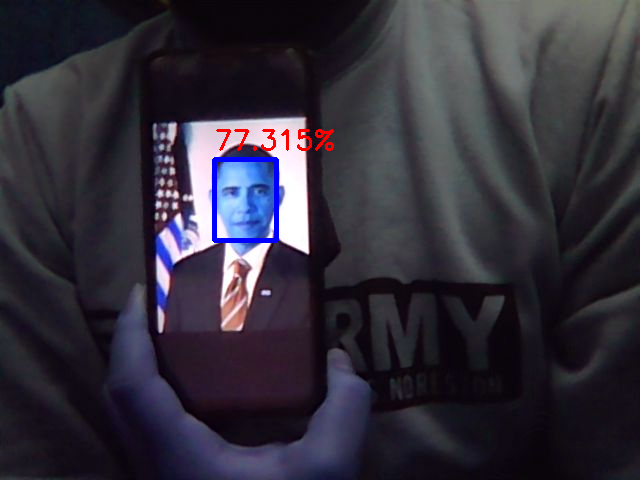

In [ ]:
detect_faces(net, img_np)

##2. Dataset Preprocessing


In [ ]:
# from google.colab import files
# files.upload()  # Upload your Kaggle API key (kaggle.json)


In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# !kaggle datasets download -d hereisburak/pins-face-recognition

100% 371M/372M [00:21<00:00, 23.1MB/s]
100% 372M/372M [00:21<00:00, 18.4MB/s]


In [ ]:
# import cv2
# import os
# import zipfile

# # Path to the dataset directory
# dataset_dir =  "/content/pins-face-recognition.zip"
# extract_dir = "/content/dataset"

# # Load the pre-trained face detection model
# net = cv2.dnn.readNetFromTensorflow(pb_files[0], pbtxt_files[0])

# # Extract the zip file
# with zipfile.ZipFile(dataset_dir, "r") as zip_ref:
#     zip_ref.extractall(extract_dir)

# output_dir = "/content/cropped_dataset"
# os.makedirs(output_dir, exist_ok=True)



In [ ]:

# # Recursive function to process images in nested folders
# def process_images_in_folder(folder_path):
#     for filename in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, filename)
#         if os.path.isdir(file_path):
#             # If it's a directory, recursively process images in the folder
#             process_images_in_folder(file_path)
#         elif filename.endswith(".jpg") or filename.endswith(".png"):
#             img = cv2.imread(file_path)
#             if img is None:
#                 print(f"Error reading image: {file_path}")
#                 continue

#             h, w = img.shape[:2]

#             # Preprocess the image
#             blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104.0, 177.0, 123.0))

#             # Pass the blob through the network to detect faces
#             net.setInput(blob)
#             detections = net.forward()

#             # Loop over the detections and crop faces from the images
#             for i in range(detections.shape[2]):
#                 confidence = detections[0, 0, i, 2]
#                 if confidence > 0.5:
#                     box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
#                     (startX, startY, endX, endY) = box.astype("int")
#                     face = img[startY:endY, startX:endX]
#                     output_path = os.path.join(output_dir, f"face_{i}_{filename}")
#                     cv2.imwrite(output_path, face)

# # Start processing images from the top-level folder
# process_images_in_folder(extract_dir)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Move the cropped_dataset folder to your Google Drive
# !mv /content/cropped_dataset /content/drive/MyDrive/


Mounted at /content/drive


In [ ]:
# import shutil
# shutil.make_archive("/content/cropped_dataset", 'zip', "/content/cropped_dataset")


'/content/cropped_dataset.zip'

In [ ]:
# from google.colab import files
# files.download("/content/cropped_dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile

zip_file_path = "/content/cropped_dataset.zip"
extract_dir = "/content/extracted_folder/"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
#splitting the dataset
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define a function to extract the label from the file name
@tf.function
def extract_label(file_name):
    parts = tf.strings.split([file_name], '_')[0]
    label_parts = parts[2:-1]
    label_with_digits = tf.strings.reduce_join(label_parts, separator='_')
    name = tf.strings.regex_replace(label_with_digits, r'\d+', '')
    name = tf.strings.strip(name)
    return name


dataset_dir = "/content/extracted_folder"
images = []
labels = []

for file_name in os.listdir(dataset_dir):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):

        # Extract the label from the file name
        result = extract_label(file_name).numpy().decode()
        labels.append(result)

        img_path = os.path.join(dataset_dir, file_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize the image to 224x224
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = img.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)


# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print the shapes of the splits
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (14092, 224, 224, 3) (14092,)
Validation set: (1761, 224, 224, 3) (1761,)
Test set: (1762, 224, 224, 3) (1762,)


##3. Face Recognition with Inception V3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the modified model architecture
base_model = InceptionV3(weights='imagenet', include_top=False)
# Freeze the base model
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(set(labels)), activation='softmax')(x)

# Create a new model with the modified architecture
model = Model(inputs=base_model.input, outputs=predictions)

# Load the weights partially
model.load_weights('/content/inception_v3_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)



In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# One-hot encode the integer labels
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_onehot = to_categorical(y_val_encoded, num_classes=num_classes)

# Use categorical_crossentropy as the loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), epochs=10, batch_size=32)


Epoch 1/10
441/441 [==============================] - 104s 226ms/step - loss: 3.7416 - accuracy: 0.1159 - val_loss: 3.3156 - val_accuracy: 0.1936
Epoch 2/10
441/441 [==============================] - 96s 218ms/step - loss: 2.9561 - accuracy: 0.2550 - val_loss: 2.9188 - val_accuracy: 0.2618
Epoch 3/10
441/441 [==============================] - 96s 218ms/step - loss: 2.5507 - accuracy: 0.3414 - val_loss: 2.7249 - val_accuracy: 0.3083
Epoch 4/10
441/441 [==============================] - 95s 216ms/step - loss: 2.2324 - accuracy: 0.4168 - val_loss: 2.5982 - val_accuracy: 0.3453
Epoch 5/10
441/441 [==============================] - 95s 216ms/step - loss: 1.9800 - accuracy: 0.4763 - val_loss: 2.5847 - val_accuracy: 0.3487
Epoch 6/10
441/441 [==============================] - 95s 216ms/step - loss: 1.7415 - accuracy: 0.5341 - val_loss: 2.4802 - val_accuracy: 0.3685
Epoch 7/10
441/441 [==============================] - 96s 218ms/step - loss: 1.5435 - accuracy: 0.5843 - val_loss: 2.5222 - val_a

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

num_classes = len(np.unique(y_train))
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)



56/56 [==============================] - 10s 185ms/step - loss: 2.7092 - accuracy: 0.3871


##4. Non-Classified Face Recognition (Cosine Similarity)

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ashwingupta3012/human-faces


100% 1.81G/1.82G [00:11<00:00, 188MB/s]
100% 1.82G/1.82G [00:11<00:00, 172MB/s]


In [ ]:
!unzip /content/human-faces.zip -d /content/undefined


In [ ]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model


# Preprocess an image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype("float32") / 255.0
    return img

# Generate embeddings for an image using your trained model
def get_embedding(img):
    embedding = model.predict(np.expand_dims(img, axis=0))[0]
    return embedding

# Load the dataset of non-classified faces
dataset_dir = "/content/undefined"
non_defined_embeddings = {}
for file_name in os.listdir(dataset_dir):
    if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jepg"):
        img_path = os.path.join(dataset_dir, file_name)
        img = preprocess_image(img_path)
        embedding = get_embedding(img)
        non_defined_embeddings[file_name] = embedding

# Function to classify a new image
def classify_image(new_img_path, threshold=0.7):
    new_img = preprocess_image(new_img_path)
    new_embedding = get_embedding(new_img)

    max_similarity = 0
    for file_name, embedding in non_defined_embeddings.items():
        similarity = cosine_similarity([new_embedding], [embedding])[0][0]
        if similarity > max_similarity:
            max_similarity = similarity

    if max_similarity < threshold:
        return "Non-defined"
    else:
        return "Classified"


In [ ]:
# Example usage
new_image_path = "/content/undefined/Humans/1 (1).jpeg"
result = classify_image(new_image_path)
print("Classification result:", result)

1/1 [==============================] - 1s 1s/step
Classification result: Non-defined
